## Student Name: Liyanze Liu
## Student Number: 1009172324

In [1]:
# Importing libraries
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
# Loading the data from an Excel
a1_data = 'INF2178_A1_data.xlsx'
a1_df = pd.read_excel(a1_data)

# Displaying the first few rows to the a1_data
a1_df.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [3]:
# Selecting specific columns
selected_columns = a1_df[['CAPACITY_TYPE', 'PROGRAM_MODEL', 
                          'SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_BED', 
                          'OCCUPIED_BEDS', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']]

# Printing the selected columns 
print(selected_columns)

             CAPACITY_TYPE PROGRAM_MODEL  SERVICE_USER_COUNT  \
0      Room Based Capacity     Emergency                  74   
1      Room Based Capacity     Emergency                   3   
2      Room Based Capacity     Emergency                  24   
3      Room Based Capacity     Emergency                  25   
4      Room Based Capacity     Emergency                  13   
...                    ...           ...                 ...   
50939   Bed Based Capacity     Emergency                   6   
50940   Bed Based Capacity     Emergency                  23   
50941   Bed Based Capacity  Transitional                  13   
50942   Bed Based Capacity     Emergency                  10   
50943   Bed Based Capacity  Transitional                  29   

       CAPACITY_ACTUAL_BED  OCCUPIED_BEDS  CAPACITY_ACTUAL_ROOM  \
0                      NaN            NaN                  29.0   
1                      NaN            NaN                   3.0   
2                      NaN    

#### 1.Room Based Capacity

In [4]:
# Filtering data for room capacity and selecting columns
room_columns = a1_df[['CAPACITY_TYPE', 'PROGRAM_MODEL', 'SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_ROOM', 
              'OCCUPIED_ROOMS']][a1_df['CAPACITY_TYPE'] == 'Room Based Capacity']

# Printing the room capacity data
print(room_columns)

             CAPACITY_TYPE PROGRAM_MODEL  SERVICE_USER_COUNT  \
0      Room Based Capacity     Emergency                  74   
1      Room Based Capacity     Emergency                   3   
2      Room Based Capacity     Emergency                  24   
3      Room Based Capacity     Emergency                  25   
4      Room Based Capacity     Emergency                  13   
...                    ...           ...                 ...   
50920  Room Based Capacity     Emergency                 128   
50923  Room Based Capacity     Emergency                  76   
50927  Room Based Capacity     Emergency                  10   
50932  Room Based Capacity     Emergency                  74   
50934  Room Based Capacity     Emergency                  27   

       CAPACITY_ACTUAL_ROOM  OCCUPIED_ROOMS  
0                      29.0            26.0  
1                       3.0             3.0  
2                      28.0            23.0  
3                      17.0            17.0  
4

In [5]:
# The number of missing values in room_columns
room_columns.isnull().sum()

CAPACITY_TYPE           0
PROGRAM_MODEL           0
SERVICE_USER_COUNT      0
CAPACITY_ACTUAL_ROOM    0
OCCUPIED_ROOMS          0
dtype: int64

In [6]:
# Computing the occupancy rate for rooms
room_columns['OCCUPANCY_RATE_ROOM'] = room_columns['OCCUPIED_ROOMS'] / room_columns['CAPACITY_ACTUAL_ROOM']

# Extracting room occupancy rates for 'Emergency' and 'Transitional' program models
room_emergency = room_columns[room_columns['PROGRAM_MODEL'] == 'Emergency']['OCCUPANCY_RATE_ROOM']
room_transitional = room_columns[room_columns['PROGRAM_MODEL'] == 'Transitional']['OCCUPANCY_RATE_ROOM']

# Performing a t-test
t_statistic, p_value = stats.ttest_ind(room_emergency, room_transitional, equal_var=False, nan_policy='omit')

# Printing the results of the t-test
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 31.71080126309493
P-Value: 4.4252019739840735e-150


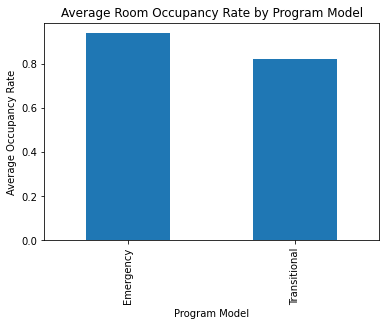

In [7]:
# Calculating and plotting the average room occupancy rate
room_average_occupancy_rate = room_columns.groupby('PROGRAM_MODEL')['OCCUPANCY_RATE_ROOM'].mean()

room_average_occupancy_rate.plot(kind='bar')
plt.title('Average Room Occupancy Rate by Program Model')
plt.xlabel('Program Model')
plt.ylabel('Average Occupancy Rate')
plt.show()

#### 2.Bed Based Capacity

In [8]:
# Filtering data for bed capacity and selecting columns
bed_columns = a1_df[['CAPACITY_TYPE', 'PROGRAM_MODEL', 'SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_BED',
                      'OCCUPIED_BEDS']][a1_df['CAPACITY_TYPE'] == 'Bed Based Capacity']

# Printing the bed capacity data
print(bed_columns)

            CAPACITY_TYPE PROGRAM_MODEL  SERVICE_USER_COUNT  \
5      Bed Based Capacity     Emergency                   6   
10     Bed Based Capacity     Emergency                  22   
11     Bed Based Capacity     Emergency                   8   
21     Bed Based Capacity  Transitional                  10   
25     Bed Based Capacity     Emergency                  11   
...                   ...           ...                 ...   
50939  Bed Based Capacity     Emergency                   6   
50940  Bed Based Capacity     Emergency                  23   
50941  Bed Based Capacity  Transitional                  13   
50942  Bed Based Capacity     Emergency                  10   
50943  Bed Based Capacity  Transitional                  29   

       CAPACITY_ACTUAL_BED  OCCUPIED_BEDS  
5                      8.0            6.0  
10                    24.0           22.0  
11                    12.0            8.0  
21                    12.0           10.0  
25                    1

In [9]:
# The number of missing values in bed_columns
bed_columns.isnull().sum()

CAPACITY_TYPE          0
PROGRAM_MODEL          2
SERVICE_USER_COUNT     0
CAPACITY_ACTUAL_BED    0
OCCUPIED_BEDS          0
dtype: int64

In [10]:
# Dropping rows with missing values
bed_filled = bed_columns.dropna()

# The number of missing values in bed_filled
bed_filled.isnull().sum()

CAPACITY_TYPE          0
PROGRAM_MODEL          0
SERVICE_USER_COUNT     0
CAPACITY_ACTUAL_BED    0
OCCUPIED_BEDS          0
dtype: int64

In [11]:
# Creating a copy of the bed_filled
bed_filled_copy = bed_filled.copy()

# Calculating the occupancy rate for beds
bed_filled_copy['OCCUPANCY_RATE_BED'] = bed_filled_copy['OCCUPIED_BEDS'] / bed_filled_copy['CAPACITY_ACTUAL_BED']

# Extracting bed occupancy rates for 'Emergency' and 'Transitional' program models
bed_emergency = bed_filled_copy[bed_filled_copy['PROGRAM_MODEL'] == 'Emergency']['OCCUPANCY_RATE_BED']
bed_transitional = bed_filled_copy[bed_filled_copy['PROGRAM_MODEL'] == 'Transitional']['OCCUPANCY_RATE_BED']

# Performing a t-test
t_statistic, p_value = stats.ttest_ind(bed_emergency, bed_transitional, equal_var=False, nan_policy='omit')

# Printing the results of the t-test
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 36.78483679745313
P-Value: 7.273950955976339e-283


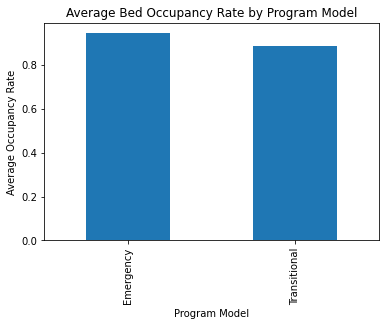

In [12]:
# Calculating and plotting the average bed occupancy rate
bed_average_occupancy_rate = bed_filled_copy.groupby('PROGRAM_MODEL')['OCCUPANCY_RATE_BED'].mean()

bed_average_occupancy_rate.plot(kind='bar')
plt.title('Average Bed Occupancy Rate by Program Model')
plt.xlabel('Program Model')
plt.ylabel('Average Occupancy Rate')
plt.show()